In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai import *
from fastai.vision import *
import pandas as pd

import tarfile
import scipy.io
import numpy as np
import cv2
import os
import shutil
import random

from torchvision.models import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

import sys
import pretrainedmodels

In [2]:
path = Path('/home/amccarthy13/Documents/car-damage-dataset')

In [4]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

data1 = ImageDataBunch.from_folder(path/'data3a','training','validation',ds_tfms=tfms, bs=64, size=424).normalize(imagenet_stats)

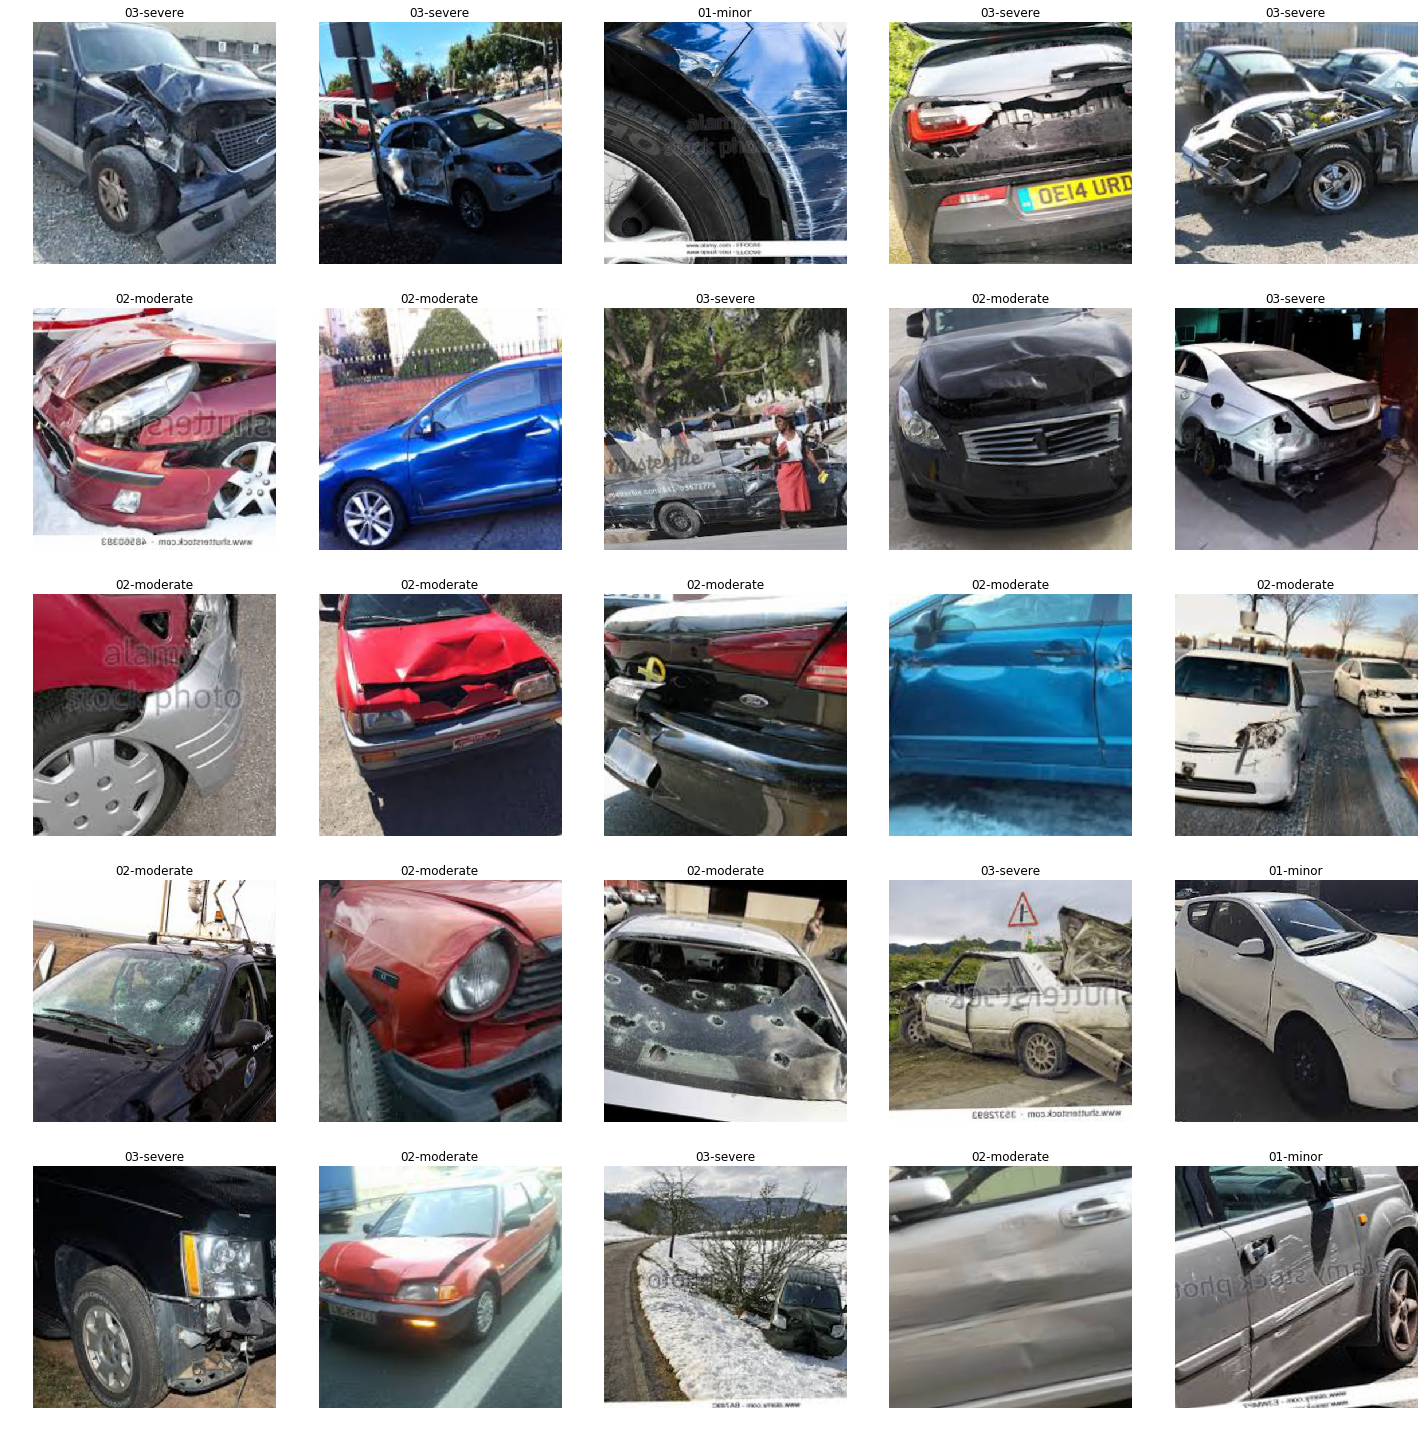

In [4]:
data1.show_batch()

In [5]:
print(len(data1.classes))
print(data1.classes)

3
['01-minor', '02-moderate', '03-severe']


In [6]:
learn1 = create_cnn(data1, models.resnet50, pretrained=True, metrics=[error_rate, accuracy])
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


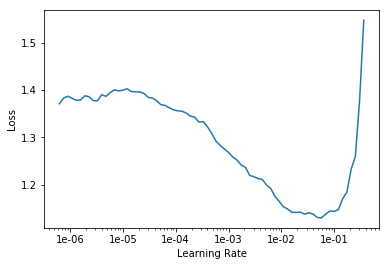

In [7]:
learn1.lr_find()
learn1.recorder.plot()

In [8]:
learn1.fit_one_cycle(10, slice(1e-3, 1e-2))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


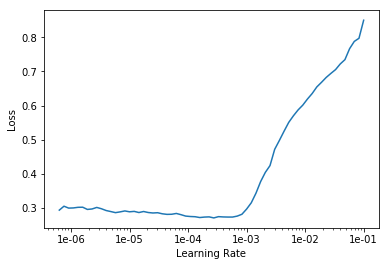

In [9]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [11]:
learn1.fit_one_cycle(10, slice(1e-5, 1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


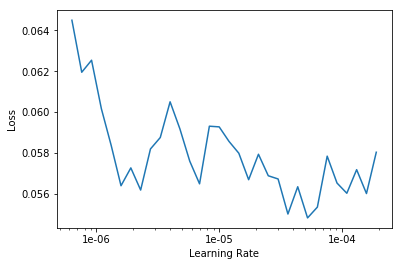

In [12]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [13]:
learn1.fit_one_cycle(10, slice(1e-6, 1e-5))

In [14]:
log_preds, y = learn1.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.6784)

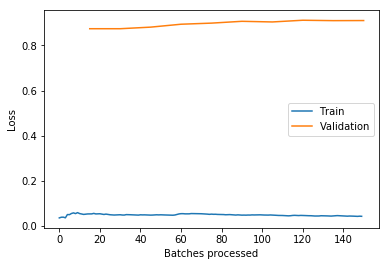

In [15]:
learn1.recorder.plot_losses()

In [16]:
preds,y,losses = learn1.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn1, preds, y, losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


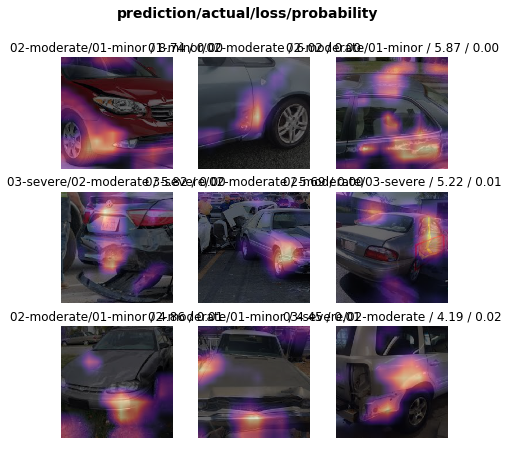

In [17]:
interp.plot_top_losses(9, figsize=(7,7))

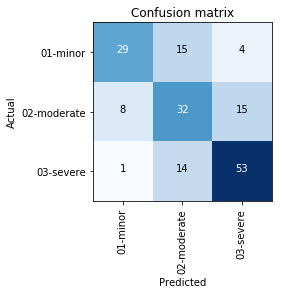

In [18]:
interp.plot_confusion_matrix()

In [20]:
xtra_tfms1 = [jitter(magnitude=0.01,p=0.5), squish(scale = 0.45)]
tfms1 = get_transforms(flip_vert=False,
                      do_flip=True,
                      max_rotate=15.0,
                      max_zoom=0.8,
                      max_lighting=0.3,
                      max_warp=0.3,
                      xtra_tfms=xtra_tfms1)

data2 = ImageDataBunch.from_folder(path/'data3a','training','validation',ds_tfms=tfms1, bs=64, size=224).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet152, pretrained=True, metrics=[error_rate, accuracy])

In [ ]:
data2.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


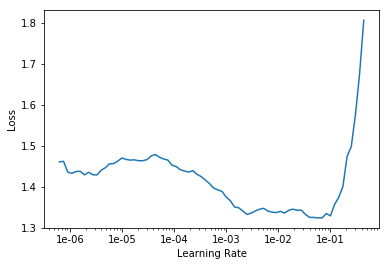

In [21]:
learn2.lr_find()
learn2.recorder.plot()

In [22]:
learn2.fit_one_cycle(10, slice(1e-4, 1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


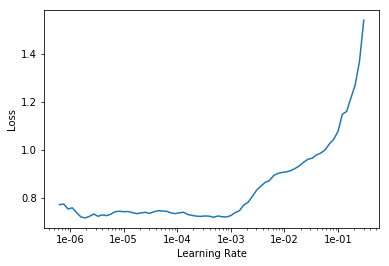

In [25]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [26]:
learn2.fit_one_cycle(10, slice(1e-5, 1e-4))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


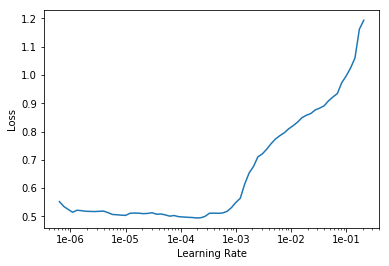

In [27]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [28]:
learn2.fit_one_cycle(10, slice(1e-6, 1e-5))

In [29]:
log_preds, y = learn2.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.6550)

In [5]:
data3 = ImageDataBunch.from_folder(path/'data3a','training','validation',ds_tfms=tfms, bs=64, size=224).normalize(imagenet_stats)
learn3 = create_cnn(data3, models.densenet161, pretrained=True, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


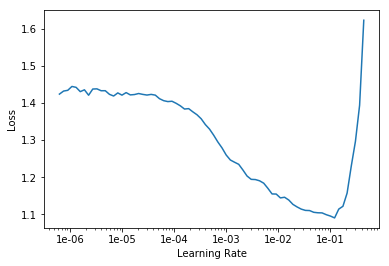

In [6]:
learn3.lr_find()
learn3.recorder.plot()

In [7]:
learn3.fit_one_cycle(10, slice(1e-3, 1e-2))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


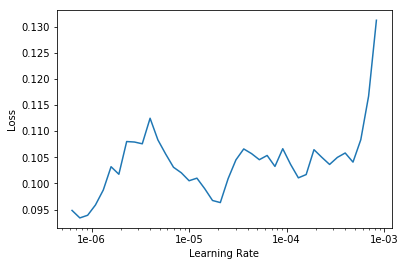

In [8]:
learn3.unfreeze()
learn3.lr_find()
learn3.recorder.plot()

In [9]:
learn3.fit_one_cycle(10, slice(1e-5, 1e-4))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


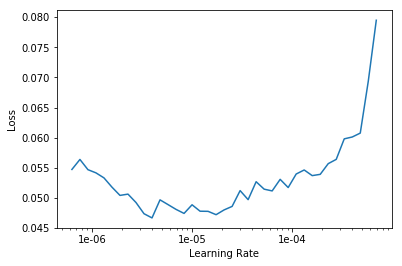

In [10]:
learn3.unfreeze()
learn3.lr_find()
learn3.recorder.plot()

In [11]:
learn3.fit_one_cycle(10, slice(1e-6, 1e-5))

In [12]:
log_preds, y = learn3.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.6784)

In [14]:
preds,y,losses = learn3.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn3, preds, y, losses)

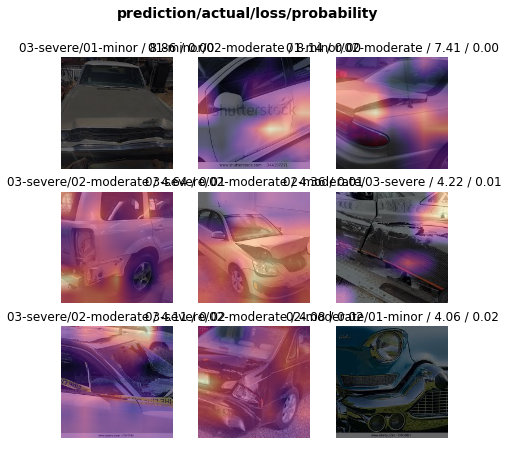

In [15]:
interp.plot_top_losses(9, figsize=(7,7))

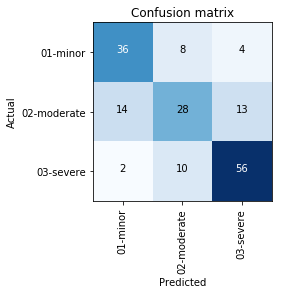

In [16]:
interp.plot_confusion_matrix()